# Probability

## Coin flipping

This is one of the simplest experiments where it is very easy to calculate probability of specific events. Assume that we are flipping a fair coin, and let $H$ be the event of getting head, and $T$ be the event of getting tail.

We know that 

$$P(H)=P(T)$$ for fair coin.

Also, we know that we should have: 

$$P(H)+P(T)=1$$ 

from which it follows that

$$P(H)=P(T)=\frac{1}{2}=0.5$$. 

Now we are going to simulate $k$ coin flippings $N$ times, and we will obtain **statistical probability** that we get head (or tail).

In the code, we use '1' to denote head, and '0' for tail.

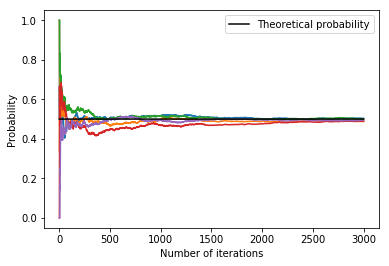

In [1]:
import matplotlib.pyplot as plt
import numpy as np

k=5
N=3000
for sim in range(0, k):

    events = np.random.randint(2, size=N)
    P_head = []
    N_heads=0
    for i in range(0, N):
        if events[i]==1:
            N_heads+=1
        P_head.append(N_heads / (i+1))
        
    plt.xlabel('Number of iterations')
    plt.ylabel('Probability')
    plt.plot(np.arange(1, N+1), P_head)
    
plt.plot(range(0, N), [1/2] * N, 'k', label = 'Theoretical probability')  # 'k' - black color
plt.legend()
plt.show()

## Rolling dice

Now we will calculate probabilities of two simple events that can happen when rolling dice. Let $A$ be the event that we got number $2$. Let $B$ be the event that we got even number. We will calculate theoretically their probabilities, and then we will verify the result by simulations. 

**Event A:** There are six events with **equal** probabilites, from which we choose one (number $2$); hence $$P(A) = \frac{1}{6} = 0.1667$$

Now we simulate N dice throwings and plot **statistical probability** of event $A$.

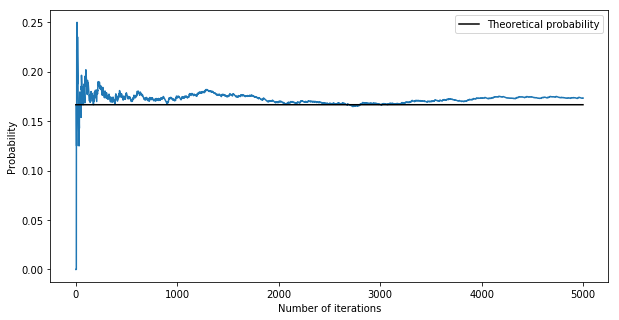

In [2]:
N_max=5000

events = 1 + np.random.randint(6, size = N_max)
P_A = []
N_A=0
for i in range(0, N_max):

    if events[i]==2:
            N_A+=1
    P_A.append(N_A / (i+1))
        
plt.xlabel('Number of iterations')
plt.ylabel('Probability')
plt.plot(np.arange(1, N_max+1), P_A)
    
plt.plot(range(0, N_max), [1/6] * N_max, 'k', label = 'Theoretical probability')  # 'k' - black color
plt.legend()
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()


**Event B:** Out of $6$ possible outcomes, 3 are even numbers, hence

$$P(B)=3/6=\frac{1}{2}=0.5$$


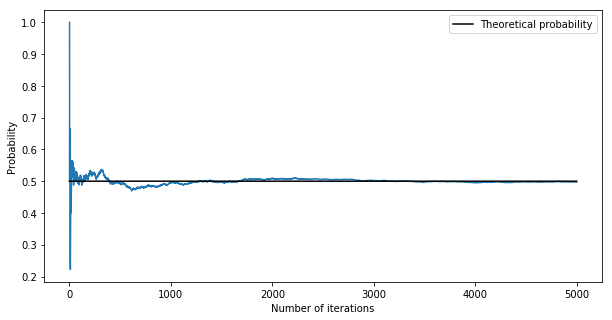

In [3]:
N_max=5000

events = 1 + np.random.randint(6, size = N_max)
P_A = []
N_A=0
for i in range(0, N_max):

    if events[i]%2==0:
            N_A+=1
    P_A.append(N_A / (i+1))
        
plt.xlabel('Number of iterations')
plt.ylabel('Probability')
plt.plot(np.arange(1, N_max+1), P_A)
    
plt.plot(range(0, N_max), [1/2] * N_max, 'k', label = 'Theoretical probability')  # 'k' - black color
plt.legend()
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

## Events in Poker

Let us perform a few simple simulations to show the agreement between theoretical probability and empirical estimates as the number of samples grows. 

Standard card deck consists of $52$ cards, each marked with one of four suits and one of $13$ ranks $1, 2, ..., 10, J, Q$, or $K$. Thus, there are $13$ cards per suit, and $4$ cards per rank. 

Consider the experiment where a card is picked at random from the deck. Let $R$ be the event that the card is red and let $F$ denote the event that it is a face card. For each of the events $R$, $F$ and $R\cup F$, 
we determine the theoretical probability, and then approximate it via simulations. 

**Event $R$**: There are $2$ red suites, each with $13$ cards, hence there are $26$ red cards, and $$P(R) = 26/52 = \frac{1}{2} = 0.5.$$

Following is a simulation of this event probability.

In [4]:
# Import a useful combinatorial functions
from itertools import product, combinations

In [5]:
# Definiion of cards
Rank = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'Q', 'K'}
Suits = {'S', 'C', 'H', 'D'}
Cards = list(product(Rank, Suits))  #Cartesian product
print(Cards)

[(1, 'H'), (1, 'D'), (1, 'C'), (1, 'S'), (2, 'H'), (2, 'D'), (2, 'C'), (2, 'S'), (3, 'H'), (3, 'D'), (3, 'C'), (3, 'S'), (4, 'H'), (4, 'D'), (4, 'C'), (4, 'S'), (5, 'H'), (5, 'D'), (5, 'C'), (5, 'S'), (6, 'H'), (6, 'D'), (6, 'C'), (6, 'S'), (7, 'H'), (7, 'D'), (7, 'C'), (7, 'S'), (8, 'H'), (8, 'D'), (8, 'C'), (8, 'S'), (9, 'H'), (9, 'D'), (9, 'C'), (9, 'S'), (10, 'H'), (10, 'D'), (10, 'C'), (10, 'S'), ('Q', 'H'), ('Q', 'D'), ('Q', 'C'), ('Q', 'S'), ('K', 'H'), ('K', 'D'), ('K', 'C'), ('K', 'S'), ('J', 'H'), ('J', 'D'), ('J', 'C'), ('J', 'S')]



 Obtained statistical probabilities P(RED CARD) are [0.5, 0.4978, 0.5018, 0.5019]


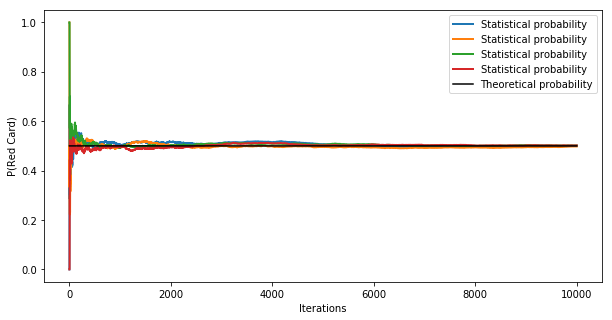

In [6]:
P_Red_final = []
num_sim=5
N=10000
for sim in range(1, num_sim):
    P_Red = []
    N_red=0
    for i in range(0, N):
        index = np.random.randint(0, 52)  # here we randomly pick a card
        if Cards[index][1] == 'H' or Cards[index][1] == 'D':
            N_red = N_red + 1
        P_Red.append(N_red/(i+1))
        
    P_Red_final.append(N_red/N)
    
    plt.plot(range(1, N+1), P_Red, linewidth = 2.0, label = 'Statistical probability')
    plt.gcf().set_size_inches([10, 5])
    plt.xlabel('Iterations')
    plt.ylabel('P(Red Card)')
    
print("\n Obtained statistical probabilities P(RED CARD) are %s" %str(P_Red_final))      
plt.plot(range(1, N+1), [0.5]*N, 'k', label = 'Theoretical probability')
plt.legend()
plt.show()

**Face Card ($F$)**: There are $4$ suits, each with $3$ face cards, hence $4\times3=12$ face cards. Therefore,
$$P(F) = 12/52 = \frac{3}{13} = 0.231.$$
Here is a simulation of this probability.


 Obtained statistical probabilities P(Face card) are [0.2253, 0.2306, 0.2338, 0.2356]


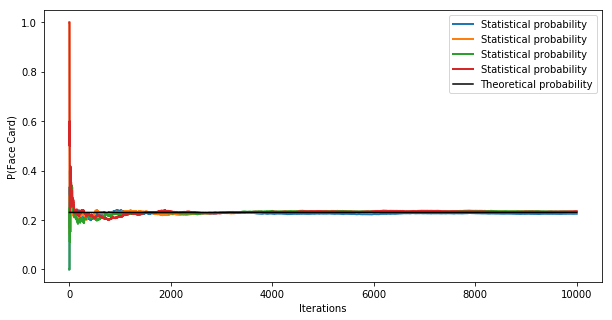

In [7]:
P_F_final = []
for sim in range(1, num_sim):
    N_F = 0
    P_F = []
    for i in range(0, N):
        index = np.random.randint(0, 52)
        if Cards[index][0] in {'J', 'K', 'Q'}:
            N_F = N_F + 1
        P_F.append(N_F/(i+1))
    
    P_F_final.append(N_F/N)
    
    plt.plot(range(1, N+1), P_F, linewidth = 2.0, label = 'Statistical probability')
    plt.gcf().set_size_inches([10, 5])
    plt.xlabel('Iterations')
    plt.ylabel('P(Face Card)')
    
print("\n Obtained statistical probabilities P(Face card) are %s" %str(P_F_final))      
plt.plot(range(1, N+1), [3/13]*N, 'k', label = 'Theoretical probability')
plt.legend()
plt.show()

**Red or Face ($R\cup F$):** Let us first calculate the probability of the event $R\cap F$. There are two red suits, $♡$ and $♢$, and each has $3$ face cards, hence $|R\cap F|=6$. Therefore, 
$$P(R\cap F) = \frac6{52} = \frac{3}{26} = 0.115.$$
By inclusion-exclusion,
$$P(R\cup F) = P(R) + P(F) - P(R\cap F)
= 0.5 + 0. 231 - 0.115 = 0.615.$$


### Exercise: Simulate the intersection and union statistical probabilities.

### Exrecise: Find statistical probability that, out of $n$ coin flips, you got between $k_1$ and $k_2$ heads.

# Permutaions and Combinations

## Permutations

We will find the number of variations without repetitions ($k$-permutations) of a set $A$, first, by finding all the possible variations, and then by directly calculating $\frac{|A|!}{(|A|-k)!}$. 

We first treat the special case $k=|A|$ - permutations without repetitions (number of ways we can order the elements of a set).

In [8]:
import itertools   # a library with combinatorial functions
A = {1, 2, 3}
permute_all = set(itertools.permutations(A))  # permutations() gives all the permutaions of a set
print("Permutations of set %s:  " %A)
for i in permute_all:
    print(i)
print;print("Number of permutations: ", len(permute_all))

Permutations of set {1, 2, 3}:  
(3, 1, 2)
(1, 3, 2)
(3, 2, 1)
(2, 3, 1)
(1, 2, 3)
(2, 1, 3)
Number of permutations:  6


In [9]:
# Direct calculation of |A|!:
from math import factorial
print(factorial(len(A)))

6


In [10]:
A = {1, 2, 3, 4}
k = 3

In [11]:
# k-permutations of set A (variations without repetitions)
n = len(A)
permute_k = list(itertools.permutations(A, k))
print("%i-permutations (variations without repetitions) of set %s:  " %(k,A))
for i in permute_k:
    print(i)
print;print("Number of permutations = ", len(permute_k))

3-permutations (variations without repetitions) of set {1, 2, 3, 4}:  
(1, 2, 3)
(1, 2, 4)
(1, 3, 2)
(1, 3, 4)
(1, 4, 2)
(1, 4, 3)
(2, 1, 3)
(2, 1, 4)
(2, 3, 1)
(2, 3, 4)
(2, 4, 1)
(2, 4, 3)
(3, 1, 2)
(3, 1, 4)
(3, 2, 1)
(3, 2, 4)
(3, 4, 1)
(3, 4, 2)
(4, 1, 2)
(4, 1, 3)
(4, 2, 1)
(4, 2, 3)
(4, 3, 1)
(4, 3, 2)
Number of permutations =  24


In [12]:
# Direct calculation |A|!/(|A|-k)! 
print(int(factorial(len(A))/factorial(len(A)-k)))

24


In [13]:
A = {'a', 'b', 'c', 'q'}
k = 3
n = len(A)
permute_k = list(itertools.permutations(A, k))
print("%i-permutations of set %s:" %(k,A))
for i in permute_k:
    print(i)
print;print("Number of permutations:", len(permute_k))

3-permutations of set {'q', 'a', 'b', 'c'}:
('q', 'a', 'b')
('q', 'a', 'c')
('q', 'b', 'a')
('q', 'b', 'c')
('q', 'c', 'a')
('q', 'c', 'b')
('a', 'q', 'b')
('a', 'q', 'c')
('a', 'b', 'q')
('a', 'b', 'c')
('a', 'c', 'q')
('a', 'c', 'b')
('b', 'q', 'a')
('b', 'q', 'c')
('b', 'a', 'q')
('b', 'a', 'c')
('b', 'c', 'q')
('b', 'c', 'a')
('c', 'q', 'a')
('c', 'q', 'b')
('c', 'a', 'q')
('c', 'a', 'b')
('c', 'b', 'q')
('c', 'b', 'a')
Number of permutations: 24


In [14]:
# Direct calculation |A|!/(|A|-k)! 
print(int(factorial(len(A))/factorial(len(A)-k)))

24


## Combinations
We will find the number of $k$-combinations of set $A$, first by finding all the combinations, and then by calculating  ${|A|}\choose{k}$.

In [15]:
A = {1, 2, 3, 4}
k = 2

kombinacije_k = list(itertools.combinations(A,k))
print("%i-combinations of set %s:  " %(k,A))
for i in kombinacije_k:
    print(i)
print;print("Number of combinations = %i" %len(kombinacije_k)  )

2-combinations of set {1, 2, 3, 4}:  
(1, 2)
(1, 3)
(1, 4)
(2, 3)
(2, 4)
(3, 4)
Number of combinations = 6


In [16]:
# Direct calculation of |A|!/(k!(|A|-k)!)   (n choose k)
print(int(factorial(len(A))/(factorial(k)*factorial(len(A)-k))))

6


In [17]:
A = {'a', 'b', 'c', 'd'}
k = 2

kombinacije_k = list(itertools.combinations(A,k))
print("%i-combinations of set %s:\n" %(k,A))
for i in range(0, len(kombinacije_k)):
    print(''.join(kombinacije_k[i]) )
print;print("Number of combinations = %i!/(%i!(%i-%i)!) = " %(n,k,n,k), len(kombinacije_k))

2-combinations of set {'d', 'a', 'b', 'c'}:

da
db
dc
ab
ac
bc
Number of combinations = 4!/(2!(4-2)!) =  6


## Birthday paradox

In a group of 5 people, what is the probability that all of them have different birthdays? On a first glance, it seems that it is quite probable, which is true for 5 people.  

However, in a group of 25 people, probability that at least two of them have the same birthday is larger than $0.5$!

In general, for a group of $n$ people we can calculate the probability that all of them have different birthdays:

\begin{align*}
P &= \frac{\text{Number of } n \text{-permutations of birthdays (or variations without rep.)}}{\text{Total number of possible birthday distributions (var. with rep.)}}\\
&= \frac{365!/(365-n)!}{365^n}\\
&= \prod_{k=1}^n \frac{365-k+1}{365}
\end{align*}

This probability drops with $n$. For $n=23$, the value is below $0.5$.

We will verify this using simulations (calculate empirical probabilities). 

In [18]:
import itertools
import random

import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


# Range of number of people
Broj_ljudi_array = np.arange(1, 26)

# Days in year
Broj_dana_u_godini = 365


def verov_razl_rodj(broj_ljudi):
    '''
    Returns probability that all birthdays are different- 
    we assume uniform distribution of birthdahys (all days are equally likely)

    '''
    return (np.arange(Broj_dana_u_godini, Broj_dana_u_godini - broj_ljudi, -1) / Broj_dana_u_godini).prod()


def uzorak(broj_ljudi):
    '''
    Randomly chooses birthdays and returns True if they are different.
    '''
    rodj = np.random.randint(0, Broj_dana_u_godini, size=broj_ljudi)
    razliciti_rodj = np.unique(rodj)
    return len(rodj) == len(razliciti_rodj)


def crtanje(iter):
    '''
    Plots theoretical and empirical probabilities of different birthdays
    '''
    emp_prob = []  # Empirical
    prob = []      # Theoretical
    
    # Calculating points
    #np.random.seed(1)
    for broj_ljudi in Broj_ljudi_array:
        br_uzoraka_sa_razl_rodj = sum(uzorak(broj_ljudi) for i in range(iter))
        
        emp_prob.append(br_uzoraka_sa_razl_rodj / iter)
        prob.append(verov_razl_rodj(broj_ljudi))
    
    # Ploting results
    
    plt.plot(Broj_ljudi_array, prob, 'k-', linewidth = 3.0, label='Theoretical probability')
    plt.plot(Broj_ljudi_array, emp_prob, 'bo-', linewidth = 3.0, label='Empirical probability')
    plt.gcf().set_size_inches(20, 10)
    plt.axhline(0.5, color='red', linewidth = 4.0, label='0.5 boundary')
    plt.xlabel('Number of people', fontsize = 18)
    plt.ylabel('Probability of different birthdays', fontsize = 18)
    plt.grid()
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.legend(fontsize = 18)
    plt.show()

    
interact(crtanje,
         iter=widgets.IntSlider(min=50, value = 500, max=5050, step=200),
         continuous_update=False);

A Jupyter Widget